# Data

## Set Options

In [1]:
import pertpy
import crispr as cr 

# regress_out = ['total_counts', 'pct_counts_mt']
n_threads = 12
regress_out = None
process_kws = dict(hvg_kws = dict(min_mean=0.0125, max_mean=3, min_disp=0.5),
                   target_sum = 1e4, max_genes_by_counts = 2500, 
                   max_pct_mt = 5, min_genes = 200, min_cells = 3, scale = 10,
                   regress_out = regress_out)

## Load & Pre-Process

In [2]:
adata = pertpy.data.bhattacherjee()
adata = cr.pp.process_data(adata, **process_kws)  # process
print(adata)
adata.obs


<<< NORMALIZING >>>

<<< FILTERING >>>

<<< DETECTING VARIABLE GENES >>>

<<< SCALING >>>



AnnData object with n_obs × n_vars = 11180 × 594
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nGene', 'nUMI', 'percent.mito', 'replicate', 'Period', 'label', 'cell_type', 'subtype', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'log1p', 'hvg'


,orig.ident,nCount_RNA,nFeature_RNA,nGene,nUMI,percent.mito,replicate,Period,label,cell_type,subtype,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
index,,,,,,,,,,,,,,,,
PFCSample9_AGCTCCTAGTGAACAT,PFCSample9,6186.0,2718,2805,6758,0.019236,PFCSample9,withdraw_15d,withdraw_15d_Cocaine,Astro,Inhib_4,409,409,530.437378,0.0,0.0
PFCSample1_CCGTTCACAATGACCT,PFCSample1,2346.0,1080,1154,2621,0.046166,PFCSample1,Maintenance,Maintenance_Cocaine,Astro,Astro_7,278,278,546.899658,0.0,0.0
PFCSample1_CCTACCAAGACGCAAC,PFCSample1,3337.0,1401,1476,3648,0.026042,PFCSample1,Maintenance,Maintenance_Cocaine,Astro,Astro_7,323,323,582.011536,0.0,0.0
PFCSample1_TCAGGTAGTAGTACCT,PFCSample1,2621.0,1126,1202,2848,0.029143,PFCSample1,Maintenance,Maintenance_Cocaine,Astro,Astro_7,290,290,556.032227,0.0,0.0
PFCSample4_AAATGCCAGCAGCCTC,PFCSample4,2369.0,1002,1064,2583,0.044135,PFCSample4,Maintenance,Maintenance_Cocaine,Astro,Astro_7,239,239,486.209473,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PFCSample8_ATGCGATCAATGGAGC,PFCSample8,5872.0,1736,1835,7950,0.019119,PFCSample8,withdraw_48h,withdraw_48h_Cocaine,Microglia,Microglia_1,416,416,651.145203,0.0,0.0
PFCSample8_CTCGGAGTCAGTTGAC,PFCSample8,4170.0,1677,1773,5900,0.031356,PFCSample8,withdraw_48h,withdraw_48h_Cocaine,Microglia,Microglia_1,412,412,710.829590,0.0,0.0
PFCSample8_GCAATCACAAGGACTG,PFCSample8,2754.0,1280,1369,3788,0.034055,PFCSample8,withdraw_48h,withdraw_48h_Cocaine,Microglia,Microglia_1,318,318,656.778076,0.0,0.0


# AUGUR Cell Type Prioritization Prediction

## Overall

Filtering samples with Maintenance_Cocaine and withdraw_48h_Cocaine labels.

Output()

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

                     Astro  Microglia  Excitatory      Endo     Oligo  \
mean_augur_score  0.704501   0.684184    0.528912  0.604138  0.595839   
mean_auc          0.704501   0.684184    0.528912  0.604138  0.595839   
mean_accuracy     0.639084   0.629487    0.527473  0.570110  0.554799   
mean_precision    0.676472   0.654556    0.538444  0.612877  0.573580   
mean_f1           0.612067   0.595693    0.503475  0.521265  0.542464   
mean_recall       0.611746   0.587619    0.511270  0.503333  0.559206   

                       OPC  Inhibitory  NF Oligo  
mean_augur_score  0.665317    0.526610  0.518503  
mean_auc          0.665317    0.526610  0.518503  
mean_accuracy     0.618095    0.506007  0.505275  
mean_precision    0.637445    0.508891  0.516945  
mean_f1           0.588544    0.443928  0.515859  
mean_recall       0.593651    0.425079  0.553651  


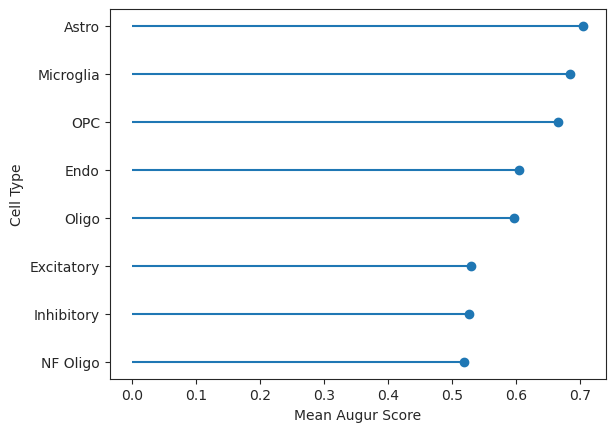

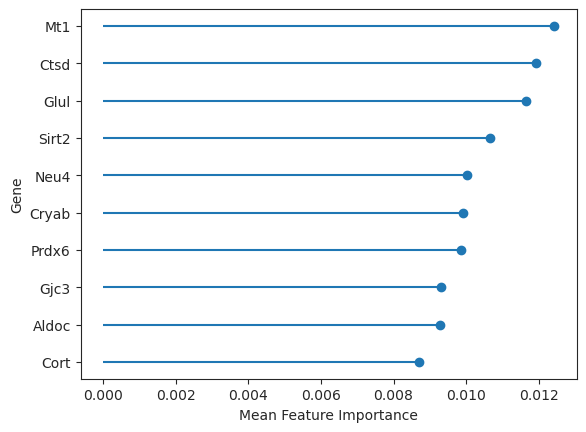

In [3]:
data, results, figs_aug = cr.ax.perform_augur(adata, assay=None,
                                              classifier="random_forest_classifier", 
                                              augur_mode="velocity", subsample_size=20,
                                              select_variance_features=False, 
                                              col_cell_type="cell_type",
                                              col_perturbation="label",
                                              key_control="Maintenance_Cocaine",
                                              key_treatment="withdraw_48h_Cocaine",
                                              seed=1618, n_threads=n_threads, plot=True)

## Differential Prioritization

We'll set a low number of permutations and subsamples just for the purpose of speed.
The defaults are 1000 and 50, respectively, for reference.

In [4]:
data_diff, results_diff, figs_aug_iff = cr.ax.perform_differential_prioritization(
    adata, "Maintenance_Cocaine", 
    ["withdraw_48h_Cocaine", "withdraw_15h_Cocaine"],
    n_permutations=2, n_subsamples=3, n_threads=n_threads, 
    classifier="random_forest_classifier", plot=True)

Filtering samples with Maintenance_Cocaine and withdraw_48h_Cocaine labels.

Filtering samples with Maintenance_Cocaine and withdraw_48h_Cocaine labels.

Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

index
PFCSample1_CCGTTCACAATGACCT-0        Astro
PFCSample1_CCTACCAAGACGCAAC-0        Astro
PFCSample1_TCAGGTAGTAGTACCT-0        Astro
PFCSample4_AAATGCCAGCAGCCTC-0        Astro
PFCSample4_AGCCTAACAGCTGTTA-0        Astro
                                   ...    
PFCSample6_TGCTGCTCAGGTTTCA-1    Microglia
PFCSample8_ATGCGATCAATGGAGC-1    Microglia
PFCSample8_CTCGGAGTCAGTTGAC-1    Microglia
PFCSample8_GCAATCACAAGGACTG-1    Microglia
PFCSample8_GGACAAGGTCGAGTTT-1    Microglia
Name: cell_type, Length: 5486, dtype: category
Categories (8, object): ['Astro', 'Endo', 'Excitatory', 'Inhibitory', 'Microglia', 'NF Oligo', 'OPC', 'Oligo']

Set smaller span value in the case of a `segmentation fault` error.

Set larger span in case of svddc or other near singularities error.

Output()

Skipping Astro cell type - 486 samples is less than min_cells 500.

Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3


/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
/home/asline01/anaconda3/envs/py-bio/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.


To use sccoda or tasccoda please install ete3 with pip install ete3
